SAMSON SONY - B210052EC - AI PROGRAMMING ASSIGNMENT 

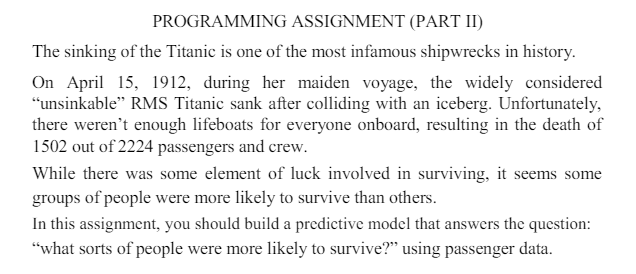

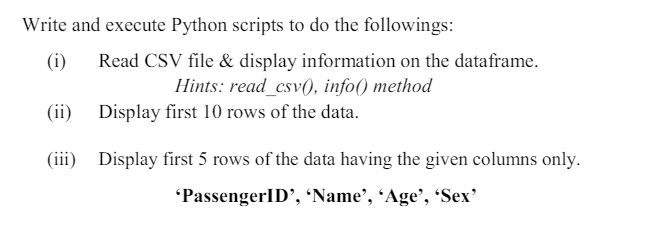

Importing libraries

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

(i)

In [2]:
filepath = "C:/Users/admin/Desktop/exp 4/titanic.csv"
df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(ii)

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df[['PassengerId', 'Name', 'Sex', 'Age']].head(5)

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,"Allen, Mr. William Henry",male,35.0


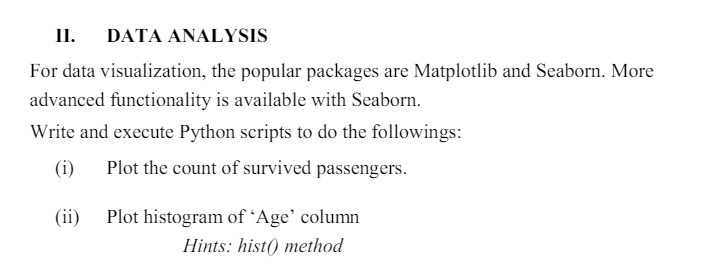

(i)

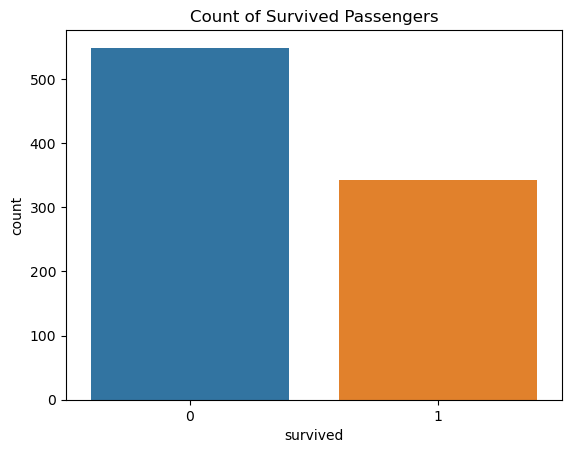

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset('titanic')
sns.countplot(x='survived', data=titanic)
plt.title('Count of Survived Passengers')
plt.show()

(ii)

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


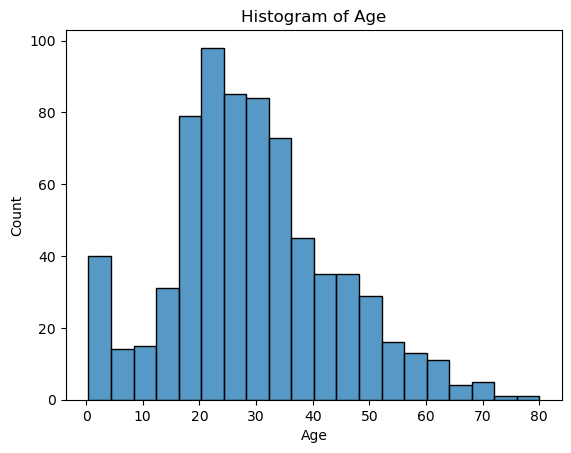

In [6]:
sns.histplot(data=titanic, x='age', bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

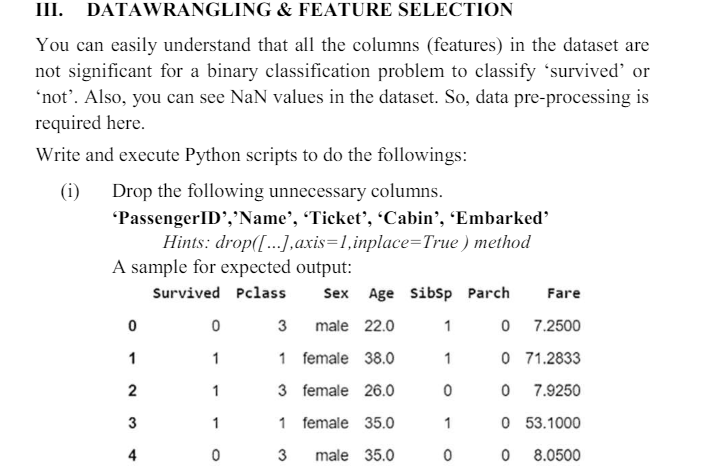

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df = df.drop(['PassengerId', 'Name' , 'Ticket' , 'Cabin', 'Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


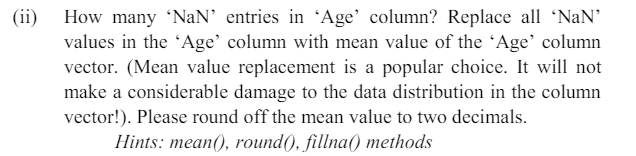

In [13]:
nan_count = df['Age'].isna().sum()
print("Number of NaN entries in the 'Age' column:", nan_count)
mean_age = round(df['Age'].mean(), 2)
print("Mean age:", mean_age)
df['Age'].fillna(mean_age, inplace=True)
nan_count_new = df['Age'].isna().sum()
print("Number of NaN entries in the age column after replacement:", nan_count_new)

Number of NaN entries in the 'Age' column: 177
Mean age: 29.7
Number of NaN entries in the age column after replacement: 0


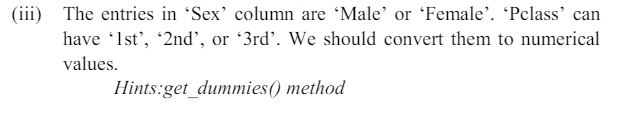

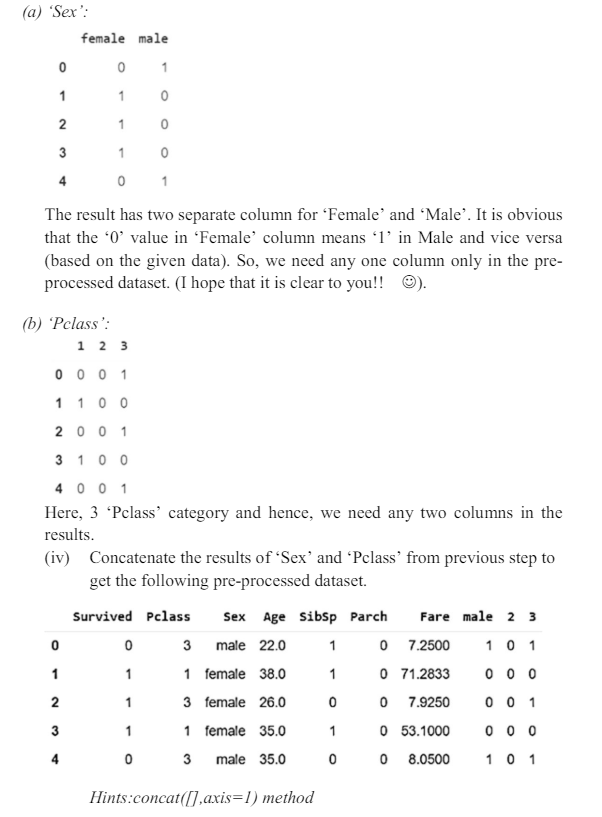

In [14]:
sex = pd.get_dummies(df['Sex'], drop_first = True,dtype = int)
pclass = pd.get_dummies(df['Pclass'],drop_first=True,dtype = int)
df = pd.concat([df,sex,pclass],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,2,3
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,1


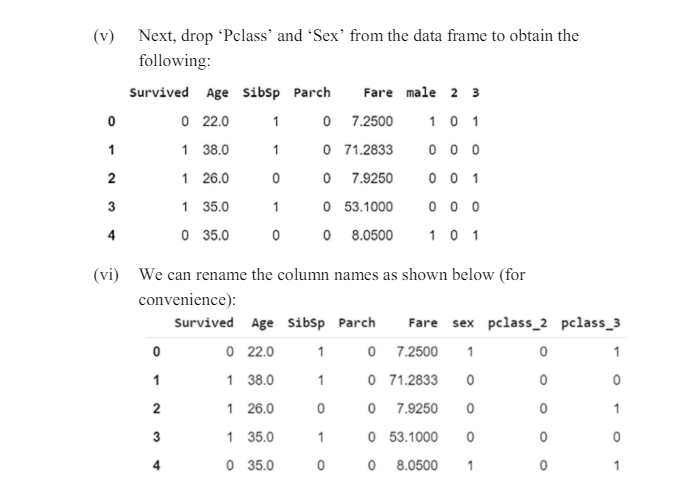

In [15]:
df = df.drop(['Sex', 'Pclass'], axis=1)
print(df.head())

   Survived   Age  SibSp  Parch     Fare  male  2  3
0         0  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         1  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  0
4         0  35.0      0      0   8.0500     1  0  1


In [16]:
df.rename(columns={'male': 'sex', 2: 'pclass_2', 3: 'pclass_3'}, inplace=True)
print(df.head())

   Survived   Age  SibSp  Parch     Fare  sex  pclass_2  pclass_3
0         0  22.0      1      0   7.2500    1         0         1
1         1  38.0      1      0  71.2833    0         0         0
2         1  26.0      0      0   7.9250    0         0         1
3         1  35.0      1      0  53.1000    0         0         0
4         0  35.0      0      0   8.0500    1         0         1


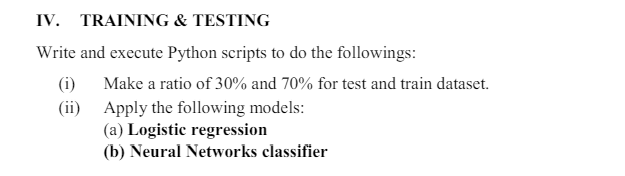

(i)

In [20]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

(ii) a

In [23]:
logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
nrpredictions = logmodel.predict(X_test)
logreg_accuracy = accuracy_score(y_test,nrpredictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7761194029850746


In [24]:
nnmodel = MLPClassifier(random_state=42)
nnmodel.fit(X_train, y_train)
nnpredictions = nnmodel.predict(X_test)
nn_accuracy = accuracy_score(y_test, nnpredictions)
print("Neural Networks Classifier Accuracy:", nn_accuracy)

Neural Networks Classifier Accuracy: 0.7835820895522388


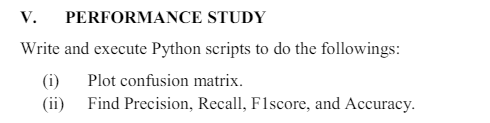


(i)

In [26]:
print(confusion_matrix(y_test, nrpredictions))

[[133  20]
 [ 40  75]]


In [27]:
print(confusion_matrix(y_test, nnpredictions))

[[137  16]
 [ 42  73]]


In [ ]:
(ii)

In [28]:
print(classification_report(y_test, nrpredictions))
print(accuracy_score(y_test, nrpredictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       153
           1       0.79      0.65      0.71       115

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

0.7761194029850746


In [29]:
print(classification_report(y_test, nnpredictions))
print(accuracy_score(y_test, nnpredictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       153
           1       0.82      0.63      0.72       115

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

0.7835820895522388


In [30]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
